In [44]:
import qiskit
from qiskit import *
import numpy as np

Number of qubits: 2
Circuit depth: 4


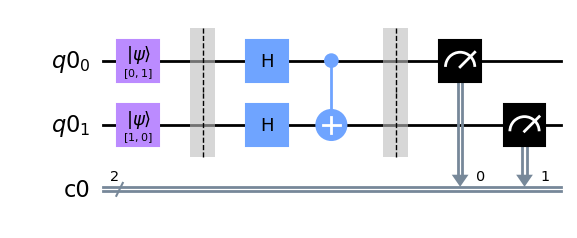

In [100]:
# FIRST CIRCUIT

cr = ClassicalRegister(2, "c0")
qr = QuantumRegister(2, "q0")

circuit = qiskit.QuantumCircuit(qr, cr)

# STATE INITIALIZATION
circuit.initialize([0,1], 0) # for qubit 0
circuit.initialize([1,0], 1) # for qubit 1
#circuit.initialize([a,b], n) where [a,b] are
#the probability amplitudes corresponding to
#|0> and |1> states (as a|0> + b|1>) and
#n is the number of the qubit we want to
#initialize.

circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.cx(0,1)
#circuit.h(1)
circuit.barrier()

#result2 = transpile(circuit, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)
#result2.to_gate().control()

circuit.measure([0,1],[0,1])
#circuit.measure_all()

print("Number of qubits: " + str(circuit.num_qubits))
print("Circuit depth: " + str(circuit.depth()))

circuit.draw(output="mpl")

In [101]:
# simulators - need to install qiskit-aer: pip install qiskit-aer

qasm_sim = qiskit.Aer.get_backend("aer_simulator")
qasm_sim.set_options(device='CPU')
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim.set_options(device='CPU')

In [102]:
# running the simulation on backend

shots = 5*1024
qasm_job = qasm_sim.run(circuit, shots=shots)
statevec_job = statevec_sim.run(circuit, shots=shots)
qasm_counts = qasm_job.result().get_counts()
statevec_counts = statevec_job.result().get_counts()
statevec_vector = statevec_job.result().get_statevector()

Backend name: aer_simulator
Number of shots: 5120
Method: statevector
Qasm simulation results:
{'11': 1330, '00': 1230, '10': 1283, '01': 1277}
Statevector([ 0.+0.0000000e+00j, -0.+0.0000000e+00j,  1.-1.2246468e-16j,
             -0.+0.0000000e+00j],
            dims=(2, 2))


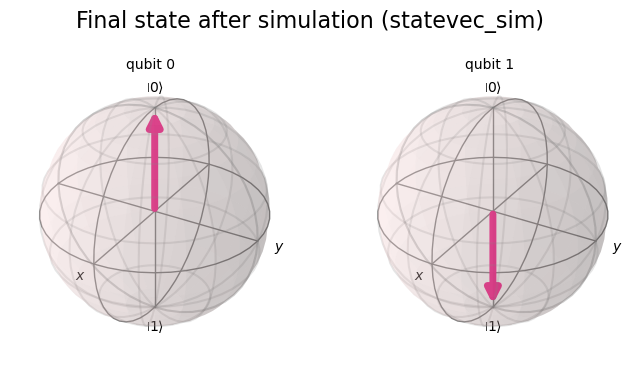

In [103]:
from qiskit.visualization import plot_bloch_multivector

print('Backend name: ' + str(qasm_job.result().backend_name))
print('Number of shots: ' + str(qasm_job.result().results[0].shots))
print('Method: ' + str(qasm_job.result().results[0].metadata['method']))
print('Qasm simulation results:')
print(qasm_counts)
print(statevec_vector)
plot_bloch_multivector(statevec_vector, title='Final state after simulation (statevec_sim)', figsize = (4,4))


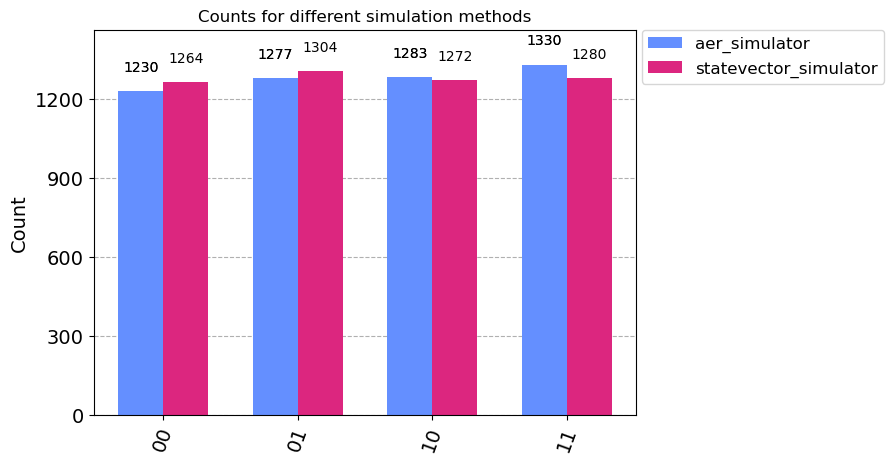

In [104]:
# PLOT SIMULATION RESULTS 

from qiskit.visualization import plot_histogram

plot_histogram([qasm_counts, statevec_counts],
               title='Counts for different simulation methods',
               legend=['aer_simulator', 'statevector_simulator'])